stability limit: 0.9999
CPU time: 0.0s
0.0
0.9999
1.9998
2.9997
3.9996
4.9995
5.9994
6.9993
7.9992
8.9991
9.999
10.9989
11.9988
12.9987
13.9986
14.9985
15.9984
16.9983
17.9982
18.9981
19.998
20.9979
21.9978
22.997700000000002
23.9976
24.9975
25.9974
26.9973
27.9972
28.9971
29.997
30.9969
31.9968
32.9967
33.9966
34.9965
35.9964
36.9963
37.9962
38.9961
39.996
40.9959
41.9958
42.9957
43.9956
44.9955
45.995400000000004
46.9953
47.9952
48.9951
49.995
50.9949
51.9948
52.9947
53.9946
54.9945
55.9944
56.9943
57.9942
58.9941
59.994


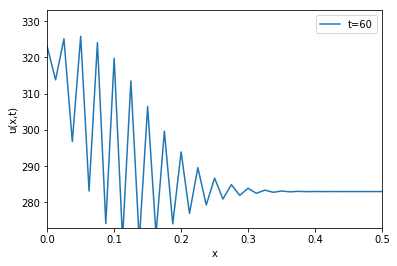

In [2]:
from numpy import linspace, zeros, linspace, asarray
import time

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 323

def dsdt(t):
    return 0

def g(x, t):
    return 0

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u,t))
    u = zeros((N_t+1, len(U_0)))
    t= linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

L = 0.5                # Rod Length
beta = 8.2E-5       # K / rho * c K = heat conduction coefficient, rho = density, c = heat capacity
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
#dt = dx**2/(2*beta) # 0.9527439
dt = 0.9999
print('stability limit:', dt)

t0 = time.perf_counter()
u, t = ode_FE(rhs, U_0, dt, T=1*60)
t1 = time.perf_counter()
print('CPU time: %.1fs' % (t1 - t0))

# Make movie
import os
os.system('rm tmp_*.png')
import matplotlib.pyplot as plt
plt.ion()
y = u[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], 273, s(0)+10])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
# Plot each of the first 100 frames, then increase speed by 10x
change_speed = 100
for i in range(0, u.shape[0]):
    print(t[i])
    plot = True if i <= change_speed else i % 10 == 0
    lines[0].set_ydata(u[i,:])
    if i > change_speed:
        plt.legend(['t=%.0f 10x' % t[i]])
    else:
        plt.legend(['t=%.0f' % t[i]])
    plt.draw()
    if plot:
        plt.savefig('tmp_%04d.png' % counter)
        counter += 1
    #time.sleep(0.2)